# CÂU HỎI: SỰ THAY ĐỔI NỒNG ĐỘ CÁC KHÍ, BỤI CÓ TRONG KHÔNG KHÍ CÓ ẢNH HƯỞNG ĐẾN CHẤT LƯỢNG KHÔNG KHÍ THEO QUÝ TRONG GIAI ĐOẠN TỪ NĂM 2016-2024 Ở SHILIN, ĐÀI LOAN KHÔNG?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons
import seaborn as sns

In [2]:
data=pd.read_csv('../Datasets/air_quality_shilin.csv')

## BIỂU ĐỒ ĐƯỜNG: BIỂU ĐỒ THỂ HIỆN SỰ THAY ĐỔI NỒNG ĐỘ CÁC KHÍ, BỤI CÓ TRONG KHÔNG KHÍ THEO QUÝ TRONG GIAI ĐOẠN TỪ 2016-2024
1. **Các thuộc tính sử dụng**
- `date`: thời điểm ghi nhận số liệu.
- `so2`: nồng độ khí SO2 có trong không khí (đơn vị ppb)
- `co`: nồng độ khí CO có trong không khí (đơn vị ppm)
- `o3`: nồng độ khí O3 có trong không khí (đơn vị ppb)
- `pm10`: nồng độ bụi có đường kính 10 micromet trở xuống (đơn vị μg/m3)
- `pm2.5`: nồng độ bụi có đường kính 2.5 micromet trở xuống (đơn vị μg/m3)
- `no2`: nồng độ khí NO2 có trong không khí (đơn vị ppb)
- `nox`: nồng độ khí NOX có trong không khí (đơn vị ppb)
- `no`: nồng độ khí NO có trong không khí (đơn vị ppb)
2. **Loại biểu đồ**

**Biểu đồ đường**: là một loại biểu đồ trực quan hóa dữ liệu hiệu quả để hiển thị sự biến động của các thuộc tính theo thời gian.

3. **Ý nghĩa của biểu đồ**

Nhận thấy sự biến động về nồng độ trong không khí của các khí và bụi theo quý trong giai đoạn từ 2016-2024

4. **Nguyên nhân sử dụng**

Biểu đồ đường tập trung hiển thị giá trị biến động từng quý, từ đó thấy được sự tăng giảm đó xảy ra ở quý nào, năm nào và nhận biết sự kiện gì đã tác động đến sự thay đổi đó.

5. **Kết luận**

- Tổng quan các khí và bụi đều có xu hướng giảm dần từ năm 2016 đến năm 2024. Nguyên nhân có thể là do đại dịch Covid-19 các hoạt động sản xuất cũng như phương tiện di chuyển có xu hướng giảm đi.
- Các đỉnh cao của nồng độ các loại khí và bụi thường xuất hiện vào các quý đầu năm và giữa năm. Lý do là vì thời tiết lúc này thường lạnh, không khí kém di chuyển, đồng thời người dân sử dụng các nguồn năng lượng để sưởi ấm từ đó nồng độ các khí này tăng lên.







C:\Users\vietl\AppData\Local\Temp\ipykernel_21968\1206015458.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  line_data=first_used_data.resample(rule="Q").mean() #Nhóm các dòng theo quý và lấy giá trị trung bình


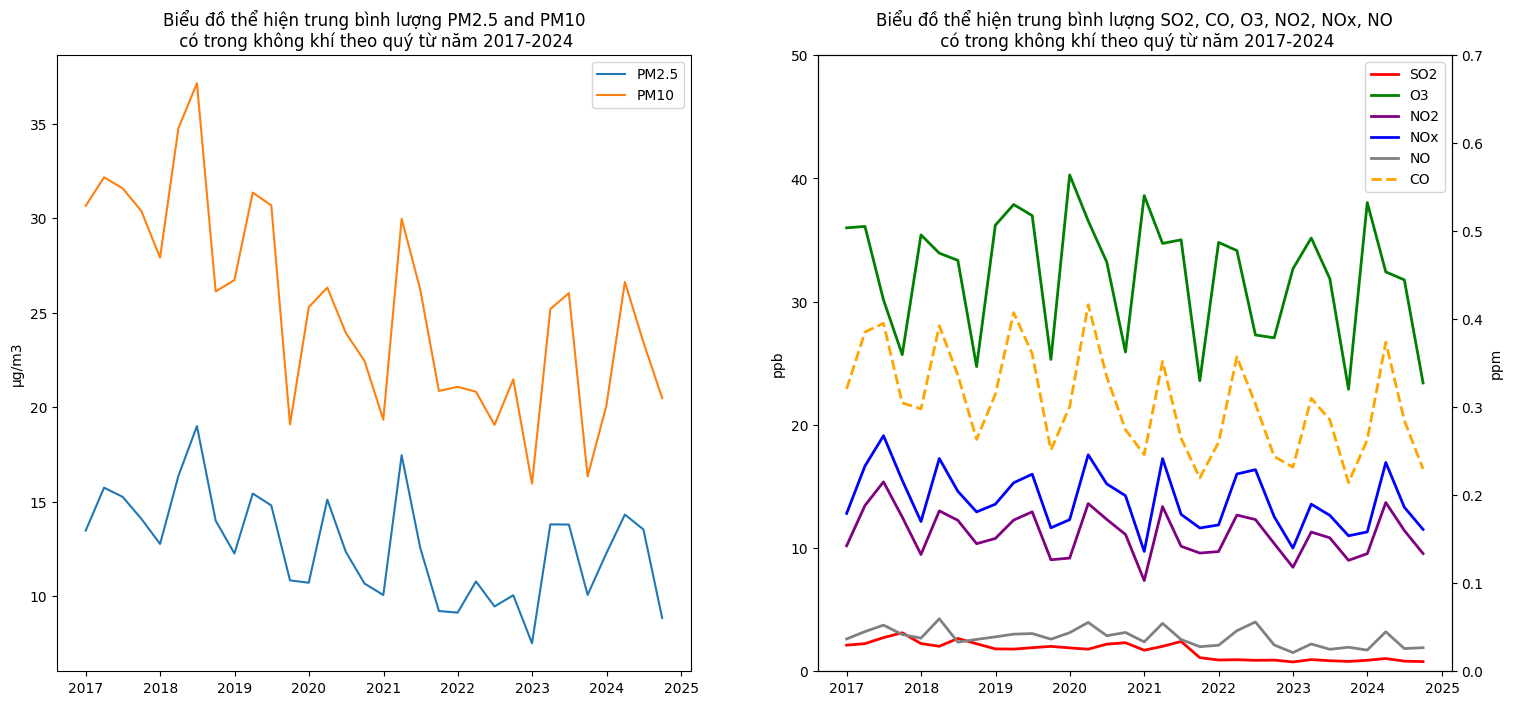

In [3]:
first_used_data=data[["date","so2","co","o3","pm10","pm2.5","no2","nox","no"]]
first_used_data=pd.DataFrame(first_used_data)
first_used_data["date"]=pd.to_datetime(first_used_data["date"]) #chuyển cột date thành kiểu datetime
first_used_data.set_index("date",inplace=True) #đặt cột date làm cột index

line_data=first_used_data.resample(rule="Q").mean() #Nhóm các dòng theo quý và lấy giá trị trung bình

fig, axes=plt.subplots(ncols=2,nrows=1,figsize=(18,8))

axes[0].plot(line_data.index,line_data["pm2.5"],label="PM2.5")
axes[0].plot(line_data.index,line_data["pm10"],label="PM10")
axes[0].set_title("Biểu đồ thể hiện trung bình lượng PM2.5 and PM10\n có trong không khí theo quý từ năm 2017-2024")
axes[0].set_ylabel("μg/m3")
axes[0].legend()

axes[1].plot(line_data.index,line_data["so2"],label="SO2",color="red",linewidth=2)
axes[1].plot(line_data.index,line_data["o3"],label="O3",color="green",linewidth=2)
axes[1].plot(line_data.index,line_data["no2"],label="NO2",color="purple",linewidth=2)
axes[1].plot(line_data.index,line_data["nox"],label="NOx",color="blue",linewidth=2)
axes[1].plot(line_data.index,line_data["no"],label="NO",color="gray",linewidth=2)
axes[1].set_title("Biểu đồ thể hiện trung bình lượng SO2, CO, O3, NO2, NOx, NO\n có trong không khí theo quý từ năm 2017-2024")
axes[1].set_ylabel("ppb")

# Trục y thứ hai (ppm cho CO)
ax2 = axes[1].twinx()
ax2.plot(line_data.index, line_data["co"], label="CO", color='orange',linewidth=2,linestyle='--')
ax2.set_ylabel("ppm")  # Đơn vị cho CO

axes[1].set_ylim(0, 50)
ax2.set_ylim(0, 0.7)

lines = axes[1].get_lines() + ax2.get_lines()  # Lấy tất cả các đường từ cả hai trục
labels = [line.get_label() for line in lines]  # Lấy các nhãn từ các đường
axes[1].legend(lines, labels, loc="upper right")

plt.show()

## BIỂU ĐỒ MIỀN: BIỂU ĐỒ THỂ HIỆN PHẦN TRĂM CHẤT LƯỢNG KHÔNG KHÍ Ở CÁC QUÝ TRONG GIAI ĐOẠN TỪ 2016-2024

1. **Các thuộc tính sử dụng**
- `date`: thời điểm ghi nhận số liệu.
- `status`: chất lượng không khí tại thời điểm ghi nhận (Good, Moderate, Unhealthy for Sensitive Groups, Unhealthy)
2. **Loại biểu đồ**

    **Biểu đồ miền**: là một loại biểu đồ trực quan hóa dữ liệu hiệu quả để hiển thị sự biến động về phần trăm của các thuộc tính trong tổng thể theo thời gian.

3. **Ý nghĩa của biểu đồ**

    Nhận thấy sự biến động về phần trăm chất lượng không khí của các quý trong giai đoạn từ 2016-2024

4. **Nguyên nhân sử dụng**

   Ở đây em đếm tần suất các thời điểm xuất hiện của Good, Moderate, Unhealthy for Sensitive Groups, Unhealthy có trong từng quý. Sau đó tính phần trăm của các tần suất này. Do đó, biểu đồ miền là biểu đồ hợp lý nhất để thể hiện sự thay đổi về phần trăm của các giá trị này trong giai đoạn 2016-2024
5. **Kết luận**
- Nhìn chung, chất lượng không khí tại Shilin, Đài Loan đã có sự cải thiện đáng kể từ năm 2016 đến năm 2024, với tỷ lệ các thời điểm có chất lượng không khí "Good" tăng lên và tỷ lệ các thời điểm có chất lượng không khí "Moderate" và "Unhealthy for Sensitive Groups" giảm đi. Sự cải thiện chất lượng không khí có thể liên quan đến các biện pháp kiểm soát ô nhiễm, giảm thiểu hoạt động công nghiệp và giao thông trong giai đoạn đại dịch Covid-19.
- Theo như nguyên nhân đã nói ở biểu đồ đường, thời điểm chất lượng không khí ở mức Good có xu hướng thấp đi ở quý đầu và giữa năm 
- Từ đó ta thấy sự thay đổi nồng đồ các loại khí và bụi trong không khí ảnh hưởng rõ rệt đến chất lượng không khí của Shilin, Đài Loan

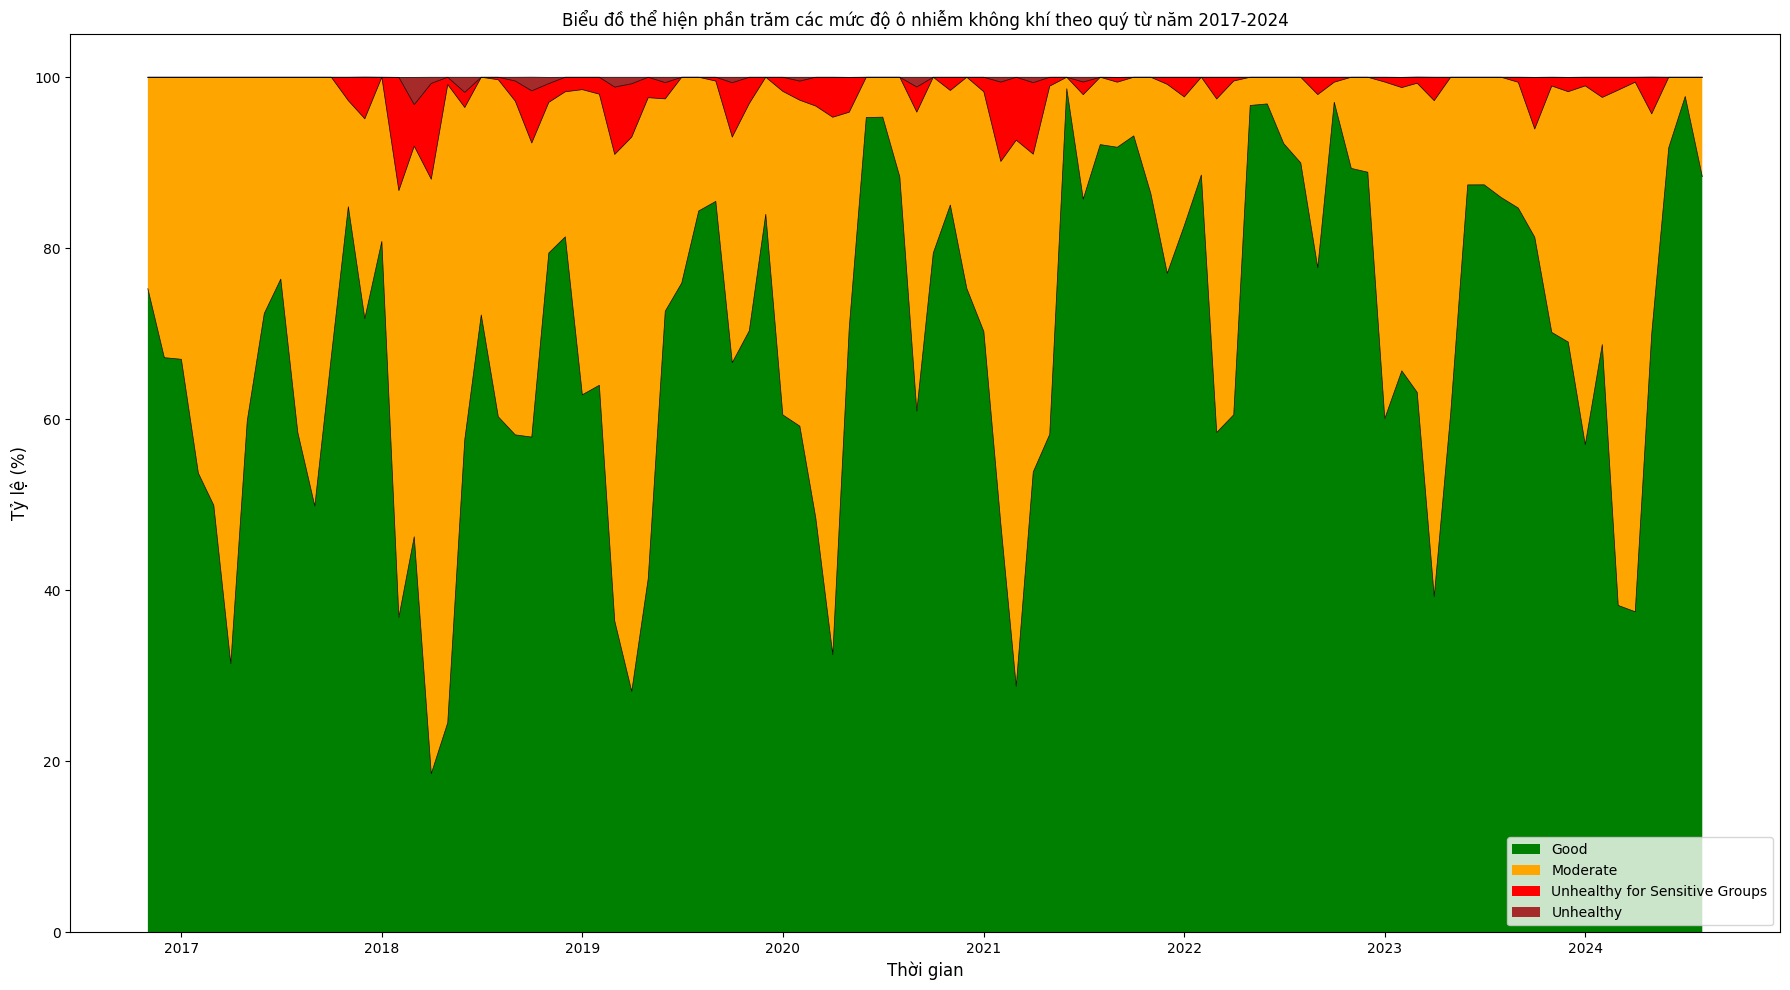

In [4]:
used_data=data[["date","status"]]
used_data=pd.DataFrame(used_data)
used_data["date"]=pd.to_datetime(used_data["date"]) #chuyển cột date thành kiểu datetime
used_data.set_index("date",inplace=True) #đặt cột date làm cột index
used_data.sort_index(inplace=True) #sắp xếp dữ liệu theo index
used_data["status"] = used_data["status"].astype('category')

# Tạo biểu đồ thể hiện số lượng mỗi loại status theo quý
status_count_data=used_data.groupby(used_data.index.to_period('M'))["status"].value_counts().unstack()
status_count_data["Total"]=status_count_data.sum(axis=1)

# Tạo biểu đồ thể hiện phần trăm mỗi loại status theo tháng
status_percentage_data=pd.DataFrame()
for i in status_count_data.columns:
    status_percentage_data[i]=status_count_data[i]*100/status_count_data["Total"]
status_percentage_data=status_percentage_data.round(2)
status_percentage_data.index = status_percentage_data.index.to_timestamp()

# Tạo biểu đồ
plt.figure(figsize=(18,10))
plt.stackplot(status_percentage_data.index,status_percentage_data["Good"],status_percentage_data["Moderate"],status_percentage_data["Unhealthy for Sensitive Groups"],status_percentage_data["Unhealthy"],labels=["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy"],colors=["green","orange","red","brown"])


# Thêm đường viền cho từng lớp
plt.plot(status_percentage_data.index, status_percentage_data["Good"], color="black", linewidth=0.5)  # Border cho "Good"
plt.plot(status_percentage_data.index, status_percentage_data["Good"] + status_percentage_data["Moderate"], color="black", linewidth=0.5)  # Border cho "Moderate"
plt.plot(status_percentage_data.index, status_percentage_data["Good"] + status_percentage_data["Moderate"] + status_percentage_data["Unhealthy for Sensitive Groups"], color="black", linewidth=0.5)  # Border cho "Unhealthy for Sensitive Groups"
plt.plot(status_percentage_data.index, status_percentage_data["Good"] + status_percentage_data["Moderate"] + status_percentage_data["Unhealthy for Sensitive Groups"] + status_percentage_data["Unhealthy"], color="black", linewidth=0.5)  # Border cho "Unhealthy"



plt.title("Biểu đồ thể hiện phần trăm các mức độ ô nhiễm không khí theo quý từ năm 2017-2024")
plt.xlabel("Thời gian", fontsize=12)
plt.ylabel("Tỷ lệ (%)", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.tight_layout()
plt.show()